In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

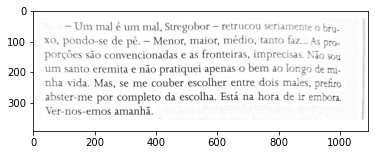

In [2]:
imagem = cv2.imread('imagens/trecho_livro.png')
plt.imshow(imagem)

In [3]:
texto = pytesseract.image_to_string(imagem, lang='por')
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bru.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porções são convencionadas e as fronteiras, imprecisas. »
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Está na hora de ir embora.
Ver-nos-emos amanhã.

 

S pro-

ão Sou

 

 



In [4]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata --psm 6'

In [5]:
texto = pytesseract.image_to_string(imagem, lang='por', config=config_tesseract)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bru.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porções são convencionadas e as fronteiras, imprecisas. »
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Está na hora de ir embora.
Ver-nos-emos amanhã.

 

S pro-

ão Sou

 

 



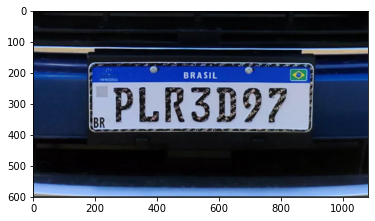

In [6]:
imagem = cv2.imread('imagens/placa_carro1.png')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)

In [7]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

In [8]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata'
texto = pytesseract.image_to_string(imagem, lang='por', config=config_tesseract)
print(texto)

## Aplicando limiar na imagem

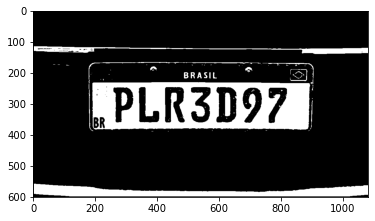

In [9]:
limiar = 160
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
plt.imshow(lim_simples, cmap='gray');

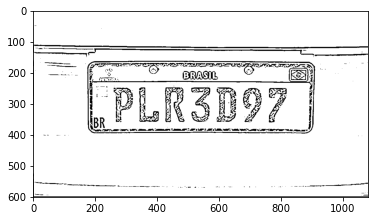

In [10]:
lim_adapt = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
plt.imshow(lim_adapt, cmap='gray');

## Limiaziração de Otsu

In [11]:
imagem

array([[ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   3, ...,   5,   5,   5],
       ...,
       [ 14,  14, 144, ..., 124, 123, 123],
       [ 14,  14,  14, ...,  14,  14,  14],
       [ 14,  14,  14, ...,  14,  14,  14]], dtype=uint8)

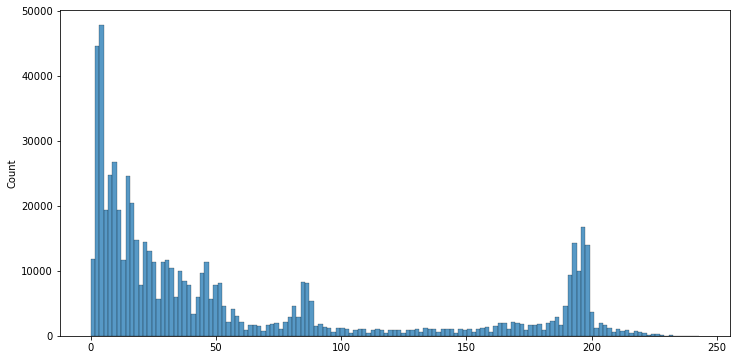

In [12]:
import seaborn as sns
ax = sns.histplot(imagem.flatten())
ax.figure.set_size_inches(12, 6)

Limiar de Otsu: 103.0


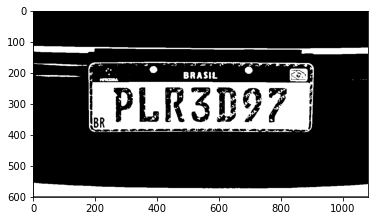

In [13]:
valor, lim_otsu = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(lim_otsu, cmap='gray');
print(f"Limiar de Otsu: {valor}")

In [14]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata --psm 6'

In [15]:
texto = pytesseract.image_to_string(lim_otsu, lang='por', config=config_tesseract)
print(texto)

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

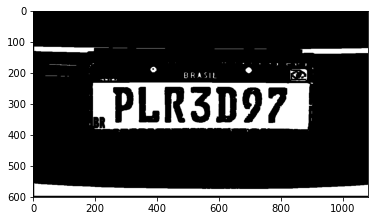

In [17]:
erosao = cv2.erode(lim_otsu, kernel)
plt.imshow(erosao, cmap='gray');

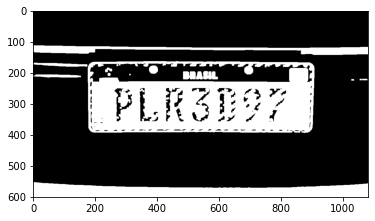

In [18]:
dilatacao = cv2.dilate(lim_otsu, kernel)
plt.imshow(dilatacao, cmap='gray');

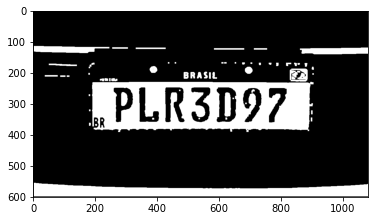

In [19]:
abertura = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)
plt.imshow(abertura, cmap='gray');

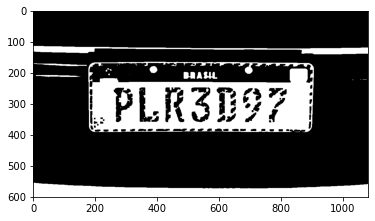

In [20]:
fechamento = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(fechamento, cmap='gray');

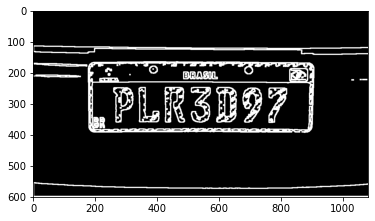

In [21]:
gradiente_morfologico = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradiente_morfologico, cmap='gray');

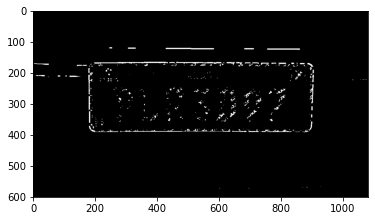

In [22]:
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel)
plt.imshow(cartola, cmap='gray');

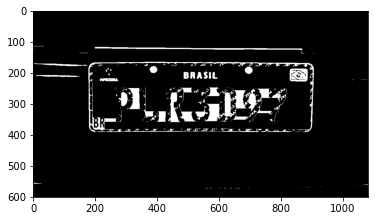

In [23]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel_retangular)
plt.imshow(cartola, cmap='gray');

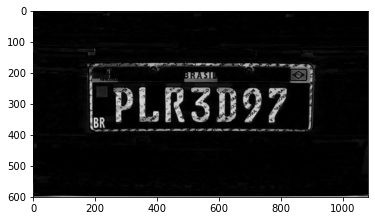

In [24]:
chapeu_preto = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
plt.imshow(chapeu_preto, cmap='gray');

In [25]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang='por', config=config_tesseract)
print(texto)

be > — TO

ua BRASIL

| PLR3D97 |



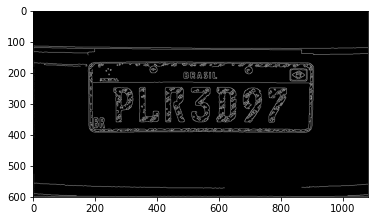

In [26]:
bordas = cv2.Canny(imagem, 100, 200)
plt.imshow(bordas, cmap='gray');

In [27]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contorno in contornos:
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break

In [28]:
localizacao

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

In [29]:
x, y, w, h = cv2.boundingRect(localizacao)

In [30]:
print(x, y, w, h)

180 168 722 224


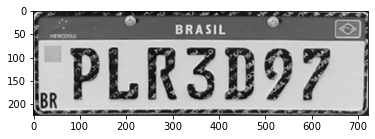

In [31]:
placa = imagem[y:y+h, x:x+w]
plt.imshow(placa, cmap='gray');

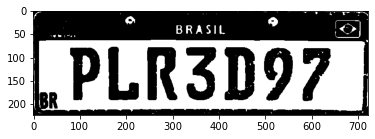

In [32]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
erosao = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
plt.imshow(erosao, cmap='gray');

In [33]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang='por', config=config_tesseract)
print(texto)

 PLR3D97.



In [34]:
import re
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
print(texto_extraido.group(0))

PLR3D97


# Aplicando em outra imagem

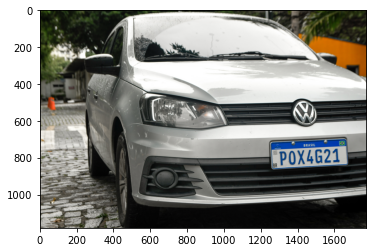

In [35]:
imagem = cv2.imread('imagens/placa_carro2.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem);

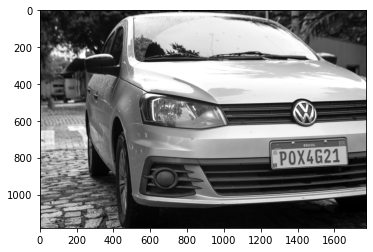

In [36]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.imshow(imagem, cmap='gray');

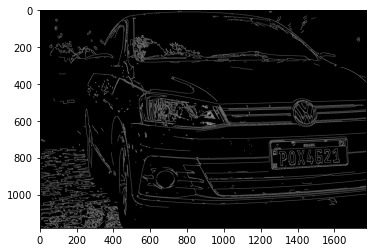

In [37]:
bordas = cv2.Canny(imagem, 100, 200)
plt.imshow(bordas, cmap='gray');

In [38]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:10]

In [39]:
for contorno in contornos:
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break

In [40]:
localizacao

array([[[1659,  737]],

       [[1255,  757]],

       [[1260,  850]],

       [[1660,  834]]], dtype=int32)

In [41]:
x, y, w, h = cv2.boundingRect(localizacao)

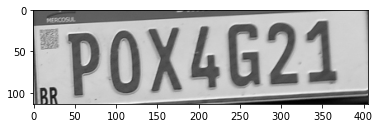

In [42]:
placa = imagem[y:y+h, x:x+w]
plt.imshow(placa, cmap='gray');

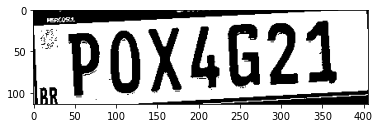

In [43]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(lim_otsu, cmap='gray');

In [44]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata --psm 6'
texto = pytesseract.image_to_string(lim_otsu, lang='por', config=config_tesseract)
print(texto)

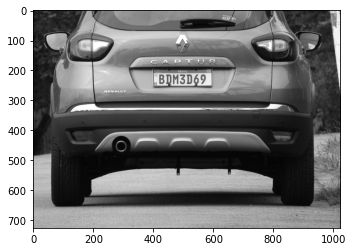

In [45]:
import cv2
import matplotlib.pyplot as plt
imagem = cv2.imread('imagens/placa_carro3.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.imshow(imagem, cmap='gray');


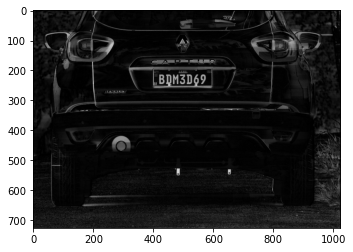

In [46]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))
chapeu_preto = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
plt.imshow(chapeu_preto, cmap='gray');

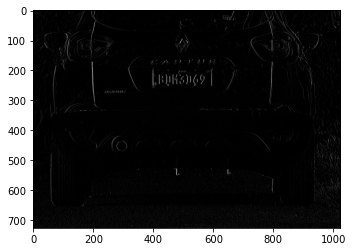

In [47]:
# Sobel
import numpy as np

sobel_x = cv2.Sobel(chapeu_preto, ddepth = cv2.CV_8UC1, dx = 1, dy = 0, ksize = 1)
sobel_x = np.absolute(sobel_x)
soxel_x = sobel_x.astype('uint8')
plt.imshow(sobel_x, cmap='gray');

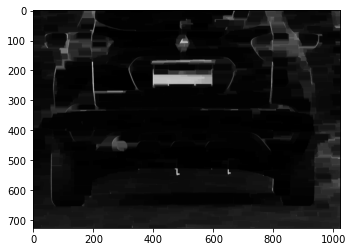

In [48]:
sobel_x = cv2.GaussianBlur(sobel_x, (5, 5), 0)
sobel_x = cv2.morphologyEx(sobel_x, cv2.MORPH_CLOSE, kernel_retangular)
plt.imshow(sobel_x, cmap='gray');


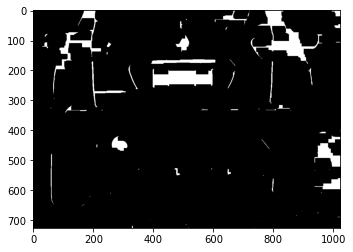

In [49]:
valor, limiarizacao = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(limiarizacao, cmap='gray');

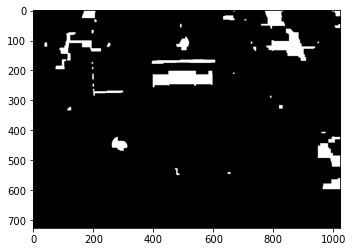

In [50]:
kernel_quadrado = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
limiarizacao =  cv2.erode(limiarizacao, kernel_quadrado, iterations = 2)
limiarizacao =  cv2.dilate(limiarizacao, kernel_quadrado, iterations = 2)
plt.imshow(limiarizacao, cmap='gray');


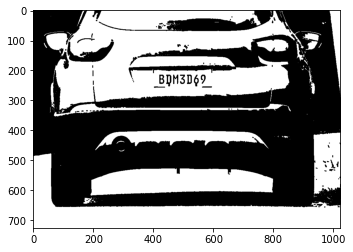

In [51]:
fechamento = cv2.morphologyEx(imagem, cv2.MORPH_CLOSE, kernel_quadrado)
valor, mascara = cv2.threshold(fechamento, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(mascara, cmap='gray');

### Bitwise and

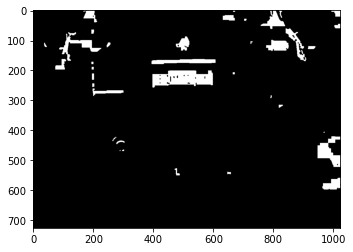

In [52]:
limiarizacao = cv2.bitwise_and(limiarizacao, limiarizacao, mask = mascara)
limiarizacao = cv2.dilate(limiarizacao, kernel_quadrado, iterations = 2)
limiarizacao = cv2.erode(limiarizacao, kernel_quadrado)
plt.imshow(limiarizacao, cmap='gray');

### Clear border

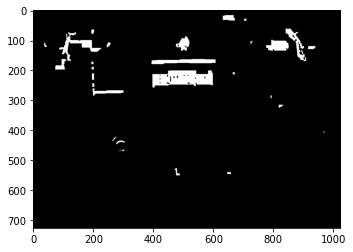

In [53]:
from skimage.segmentation import clear_border
limiarizacao = clear_border(limiarizacao)
plt.imshow(limiarizacao, cmap='gray');

In [54]:
contornos, hierarquia = cv2.findContours(limiarizacao, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:10]
contornos

[array([[[454, 201]],
 
        [[453, 202]],
 
        [[449, 202]],
 
        [[449, 212]],
 
        [[448, 213]],
 
        [[397, 213]],
 
        [[397, 256]],
 
        [[398, 257]],
 
        [[402, 257]],
 
        [[402, 256]],
 
        [[403, 255]],
 
        [[404, 255]],
 
        [[404, 251]],
 
        [[405, 250]],
 
        [[446, 250]],
 
        [[447, 251]],
 
        [[449, 251]],
 
        [[449, 249]],
 
        [[450, 248]],
 
        [[452, 248]],
 
        [[453, 247]],
 
        [[534, 247]],
 
        [[535, 248]],
 
        [[535, 252]],
 
        [[540, 252]],
 
        [[540, 242]],
 
        [[541, 241]],
 
        [[543, 241]],
 
        [[544, 242]],
 
        [[544, 247]],
 
        [[590, 247]],
 
        [[591, 248]],
 
        [[591, 249]],
 
        [[597, 249]],
 
        [[597, 211]],
 
        [[596, 210]],
 
        [[596, 208]],
 
        [[594, 208]],
 
        [[593, 207]],
 
        [[593, 201]],
 
        [[582, 201]],
 
        [[582, 2

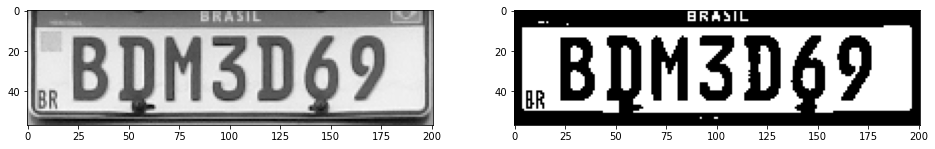

In [63]:
for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)
    proporcao = float(w) / h
    if proporcao >= 3 and proporcao <= 4:
        placa = imagem[y:y+h, x:x+w]
        valor, regiao_interesse = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        regiao_interesse = clear_border(regiao_interesse)

        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(placa, cmap='gray');
        plt.subplot(1, 2, 2)
        plt.imshow(regiao_interesse, cmap='gray');




In [68]:
config_tesseract = '/usr/share/tesseract-ocr/4.00/tessdata --psm 6'
texto = pytesseract.image_to_string(regiao_interesse, lang='eng', config=config_tesseract)
print(f'Texto extraido: {texto}')

Texto extraido: 


In [65]:
import re
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
print(f'Placa: {texto_extraido.group(0)}')

AttributeError: 'NoneType' object has no attribute 'group'